# Grundlagen digitale Bildverarbeitung

Dieses Notebook ist die Ergänzung zur Vorlesung 4. Es enthält folgende Themen:

1. Grundlegende Operationen auf Bildern
2. Farbräume
3. Histogramme
4. Faltung und Filterung
5. (Morphologische Operationen) --> Wird für die Abgabe nicht benötigt und basiert meist auf schneller openCV implementierung.

Anders als in der Abgabe, verwenden wir hier teilweise die Bibliothek `opencv` um die Operationen durchzuführen. Die Bibliothek ist in Python geschrieben und bietet viele Funktionen für die Bildverarbeitung, die wir in der Vorlesung besprochen haben.

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

## 1. Grundlegende Operationen auf Bildern

Dieser Abschnitt behandelt die grundlegenden Operationen auf Bildern. Dazu gehören das Laden und Speichern von Bildern, das Anzeigen von Bildern, sowie das Zugreifen auf einzelne Pixelwerte.

### 1.1. Laden, Anzeigen und Speichern von Bildern

Zum Laden und Speichern von Bildern verwenden wir die Bibliothek `opencv`. Die Funktion `cv2.imread` lädt ein Bild von der Festplatte und gibt ein `numpy`-Array zurück. Die Funktion `cv2.imwrite` speichert ein Bild auf der Festplatte.

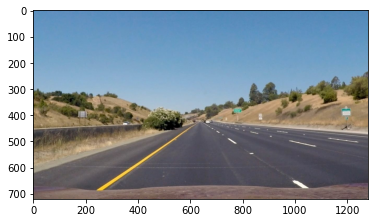

True

In [2]:
# Lese Bild ein
img = cv2.imread('img/image001.jpg', -1)  # -1 = Originalbild

# Zeige das Bild in einem OpenCV Fenster an
cv2.imshow('image', img)
cv2.waitKey(0)  # Warte auf Tastendruck

# Zeige das Bild in einem Matplotlib Fenster an
plt.figure()
# OpenCV verwendet BGR, Matplotlib RGB
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

# Speichere das Bild
cv2.imwrite('img/example_copy.jpeg', img)

## 1.2 Zugriff auf Pixelwerte

Ein Bild ist ein 2D-Array, das die Pixelwerte enthält. Die Pixelwerte können mit Hilfe von Indizes zugegriffen werden. Ein Pixelwert ist ein Array mit drei Elementen, die die Farbwerte Rot, Grün und Blau enthalten. Über `numpy` können wir auf die Pixelwerte zugreifen und sie verändern.

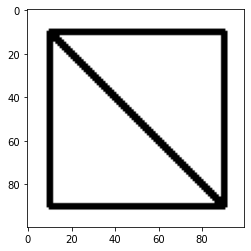

In [3]:
# Erstelle ein leeres Bild
img_empty = np.zeros((100, 100, 3), np.uint8)
img_empty.fill(255)  # Fülle das Bild mit Weiß

# Zeichne ein Rechteck
cv2.rectangle(img_empty, (10, 10), (90, 90), (0, 0, 0), 2)

# Zeichne eine Linie
cv2.line(img_empty, (10, 10), (90, 90), (0, 0, 0), 2)

# Zeige das Bild
plt.figure()
plt.imshow(img_empty)
plt.show()

[0 0 0]


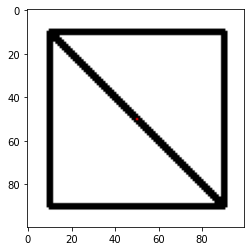

In [4]:
# Welche Farbe hat das Pixel (50, 50)?
print(img_empty[50, 50])
# Setze die Farbe des Pixels (50, 50) auf Rot
img_empty[50, 50] = [255, 0, 0]

# Zeige das Bild
plt.figure()
plt.imshow(img_empty)
plt.show()

## 1.3 Maskierung

Die Maskierung von Bildern kann verwendet werden, um bestimmte Pixelbereiche auszuwählen oder zu verändern. Dazu wird ein binäres Bild verwendet, das die Maske darstellt. Die Maske hat die gleiche Größe wie das Originalbild und enthält an den Stellen, an denen die Maske den Wert 1 hat, die Originalpixelwerte. An den Stellen, an denen die Maske den Wert 0 hat, werden die Pixelwerte verändert. Dadurch lassen sich störende Bereiche in Bildern entfernen oder bestimmte Bereiche hervorheben.

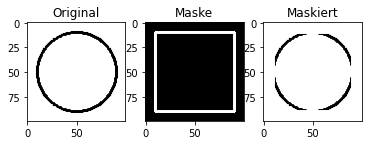

In [5]:
# Erstelle ein leeres Bild
img_empty = np.zeros((100, 100, 3), np.uint8)
img_empty.fill(255)  # Fülle das Bild mit Weiß

# Zeichne einen Kreis
cv2.circle(img_empty, (50, 50), 40, (0, 0, 0), 2)

# Erstelle Maske
mask = np.zeros((100, 100), np.uint8)
mask.fill(0)
cv2.polylines(mask, [np.array(
    [[10, 10], [90, 10], [90, 90], [10, 90]], np.int32)], True, 255, 2)

# Wende Maske auf Bild an
img_masked = img_empty.copy()
img_masked[mask == 255] = [255, 255, 255]

# Zeige alle drei Bilder
fig, axs = plt.subplots(1, 3)
axs[0].imshow(img_empty)
axs[0].set_title('Original')
axs[1].imshow(mask, cmap='gray')
axs[1].set_title('Maske')
axs[2].imshow(img_masked)
axs[2].set_title('Maskiert')
plt.show()

Wichtig: Bei der Linienerkennung werden meistens die Masken so dargestellt, dass Linien als Weiß und der Hintergrund als schwarz.

## 2. Farbräume

Im folgenden werden die Farbräume RGB, HSV und Graustufen vorgestellt und eine Umrechnung zwischen den Farbräumen durchgeführt (auch ohne `opencv`).

Der RGB-Farbraum besteht aus den drei Farbkanälen Rot, Grün und Blau. Jeder Farbkanal hat einen Wertebereich von 0 bis 255. Die Farbe eines Pixels wird durch die Kombination der Farbkanäle bestimmt. **Achtung: Bei `opencv` wird die Reihenfolge der Farbkanäle vertauscht, sodass die Farbe eines Pixels durch die Kombination der Farbkanäle Blau, Grün und Rot bestimmt wird.**

Der HSV-Farbraum besteht aus den drei Farbkanälen Hue, Saturation und Value. Hue beschreibt den Farbton, Saturation die Sättigung und Value die Helligkeit. Die Farbe eines Pixels wird durch die Kombination der Farbkanäle bestimmt. Das eignet sich besonders gut für die Filterung von Farben.

#### OpenCV

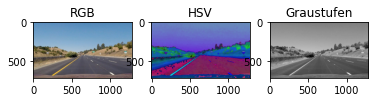

In [6]:
# Lade das Beispielbild
img = cv2.imread('img/image001.jpg', -1)

img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Zeige alle drei Bilder
fig, axs = plt.subplots(1, 3)
axs[0].imshow(img_rgb)
axs[0].set_title('RGB')
axs[1].imshow(img_hsv, cmap='hsv')
axs[1].set_title('HSV')
axs[2].imshow(img_gray, cmap='gray')
axs[2].set_title('Graustufen')
plt.show()

HSV sieht in Matplotlib ein wenig komisch aus, weil die Farben nicht richtig dargestellt werden.

### Numpy

C:\Users\tomfr\AppData\Local\Temp\ipykernel_9652\3164800126.py:26: RuntimeWarning: invalid value encountered in true_divide
  s = (max_val - min_val) / max_val
C:\Users\tomfr\AppData\Local\Temp\ipykernel_9652\3164800126.py:31: RuntimeWarning: invalid value encountered in true_divide
  delta_r = (max_val - r) / delta
C:\Users\tomfr\AppData\Local\Temp\ipykernel_9652\3164800126.py:32: RuntimeWarning: invalid value encountered in true_divide
  delta_g = (max_val - g) / delta
C:\Users\tomfr\AppData\Local\Temp\ipykernel_9652\3164800126.py:33: RuntimeWarning: invalid value encountered in true_divide
  delta_b = (max_val - b) / delta
C:\Users\tomfr\AppData\Local\Temp\ipykernel_9652\3164800126.py:39: RuntimeWarning: invalid value encountered in remainder
  h = (h / 6) % 1


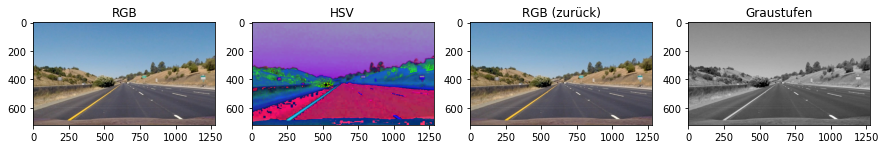

In [7]:
# Lade das Beispielbild
img = cv2.imread('img/image001.jpg', -1)


def bgr2rgb(img):
    """Konvertiere BGR zu RGB mit numpy"""
    return img[..., ::-1]


def rgb2hsv(img):
    """Konvertiere RGB zu HSV mit numpy"""
    # Normalisiere die Werte des Bildes von 0-255 auf 0-1
    img = img / 255.0

    # Extrahiere die einzelnen Farbkanäle
    r, g, b = img[..., 0], img[..., 1], img[..., 2]

    # Berechne den Maximal- und Minimalwert für jeden Pixel
    max_val = np.max(img, axis=-1)
    min_val = np.min(img, axis=-1)

    # Berechne den Wert (Value)
    v = max_val

    # Berechne die Sättigung (Saturation)
    s = (max_val - min_val) / max_val
    s[max_val == 0] = 0

    # Berechne den Farbton (Hue)
    delta = max_val - min_val
    delta_r = (max_val - r) / delta
    delta_g = (max_val - g) / delta
    delta_b = (max_val - b) / delta

    h = np.zeros_like(max_val)
    h[r == max_val] = delta_b[r == max_val] - delta_g[r == max_val]
    h[g == max_val] = 2 + delta_r[g == max_val] - delta_b[g == max_val]
    h[b == max_val] = 4 + delta_g[b == max_val] - delta_r[b == max_val]
    h = (h / 6) % 1

    # Skaliere die Werte von 0-1 auf 0-255
    h = h * 255
    s = s * 255
    v = v * 255

    # Erstelle das HSV-Bild
    hsv_img = np.stack((h, s, v), axis=-1)

    return hsv_img.astype(np.uint8)


def hsv2rgb(hsv):
    """Konvertiere ein HSV-Bild zu einem RGB-Bild mit numpy"""
    # Normalisiere die Werte des Bildes von 0-255 auf 0-1
    hsv = hsv.astype('float') / 255

    # Extrahiere die einzelnen Farbkanäle
    h, s, v = hsv[..., 0], hsv[..., 1], hsv[..., 2]

    # Berechne den Farbton (Hue) in Grad
    h = (h * 360) % 360

    # Berechne den Farbton in Radiant
    h_rad = np.radians(h)

    # Berechne die Winkel für die Farbkanäle
    i = (h / 60).astype(int)
    f = (h / 60) - i
    p = v * (1 - s)
    q = v * (1 - s * f)
    t = v * (1 - s * (1 - f))

    # Berechne die RGB-Kanäle
    conditions = [s == 0, i == 1, i == 2, i == 3, i == 4, i == 5]
    r = np.select(conditions, [v, q, p, p, t, v], default=v)
    g = np.select(conditions, [v, v, v, q, p, p], default=t)
    b = np.select(conditions, [v, t, v, v, v, q], default=p)

    # Skaliere die Werte von 0-1 auf 0-255
    r = (r * 255).astype('uint8')
    g = (g * 255).astype('uint8')
    b = (b * 255).astype('uint8')

    # Erstelle das RGB-Bild
    rgb = np.stack((r, g, b), axis=-1)

    return rgb


def rgb2gray(img):
    """Konvertiere RGB zu Grayscale"""
    return np.dot(img[..., :3], [0.2989, 0.5870, 0.1140]).astype(np.uint8)


# Konvertiere
img_rgb = bgr2rgb(img)
img_hsv = rgb2hsv(img_rgb)
img_rgb_back = hsv2rgb(img_hsv)
img_gray = rgb2gray(img_rgb)

# Zeige alle vier Bilder
fig, axs = plt.subplots(1, 4, figsize=(15, 5))
axs[0].imshow(img_rgb)
axs[0].set_title('RGB')
axs[1].imshow(img_hsv, cmap='hsv')
axs[1].set_title('HSV')
axs[2].imshow(img_rgb_back)
axs[2].set_title('RGB (zurück)')
axs[3].imshow(img_gray, cmap='gray')
axs[3].set_title('Graustufen')
plt.show()

### Verwendung um gelbe Linien zu erkennen
Dieser Ansatz verwendet die Farbkanäle (H) des HSV-Farbraums, um gelbe Linien zu erkennen. Dazu wird ein Schwellenwert für den Value-Kanal festgelegt, der die gelben Linien hervorhebt. Anschließend wird eine Maske erstellt, die die gelben Linien enthält.
Normalerweise wird der Schwellenwert über ein Histogramm bestimmt, das die Verteilung der Pixelwerte im Value-Kanal zeigt. Der Schwellenwert wird so gewählt, dass die gelben Linien hervorgehoben werden.

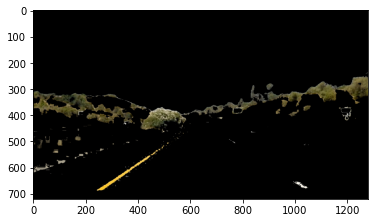

In [8]:
# Verwende HSV img und filter nach Farbwert gelb (30-60)
img_yellow = img_hsv.copy()

# Setze alle Pixel auf 0, die nicht im Farbbereich liegen
# "..." bedeutet, dass wir alle Dimensionen außer der letzten betrachten (also alle Pixel)
# img_yellow[..., 0] sind die Farbwerte (Hue) des Bildes
img_yellow[(img_yellow[..., 0] < 30) | (img_yellow[..., 0] > 60)] = 0

# Konvertiere zurück zu RGB
img_yellow_rgb = hsv2rgb(img_yellow)

# Zeige das Bild
plt.figure()
plt.imshow(img_yellow_rgb)
plt.show()

## 3. Histogramme
Histogramme sind eine wichtige Methode zur Analyse von Bildern. Sie zeigen die Verteilung der Pixelwerte in einem Bild und können verwendet werden, um die Helligkeit und den Kontrast eines Bildes zu verändern. Histogramme können auch dazu verwendet werden, um Farben zu filtern oder um Objekte in Bildern zu erkennen.

### 3.1. Berechnung des Histogramms

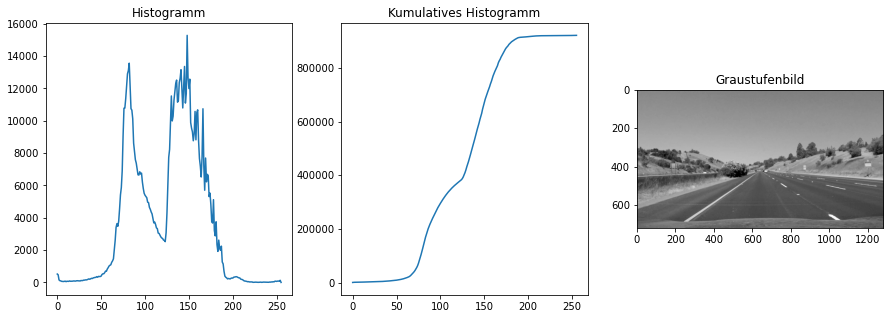

In [9]:
def histogram(img):
    """Berechne das Histogramm eines Graustufenbildes"""
    hist = np.zeros(256)
    for i in range(256):
        hist[i] = np.sum(img == i)
    return hist


def histogram_rgb(img):
    """Berechne das Histogramm eines RGB-Bildes"""
    hist = np.zeros((3, 256))
    for i in range(3):
        for j in range(256):
            hist[i, j] = np.sum(img[..., i] == j)
    return hist


def comulative_histogram(hist):
    """Berechne das kumulative Histogramm"""
    cum_hist = np.zeros_like(hist)
    cum_hist[0] = hist[0]
    for i in range(1, 256):
        cum_hist[i] = cum_hist[i - 1] + hist[i]
    return cum_hist


# Lade das Beispielbild
img = cv2.imread('img/image001.jpg', -1)
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Berechne das Histogramm
hist = histogram(img_gray)

# Berechne das kumulative Histogramm
cum_hist = comulative_histogram(hist)

# Zeige das Histogramm
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
axs[0].plot(hist)
axs[0].set_title('Histogramm')
axs[1].plot(cum_hist)
axs[1].set_title('Kumulatives Histogramm')
axs[2].imshow(img_gray, cmap='gray')
axs[2].set_title('Graustufenbild')
plt.show()

### 3.2. Anwendung des Histogramms - Histogrammgleichung

Die Histogrammgleichung ist eine Methode zur Anpassung der Helligkeit und des Kontrasts eines Bildes. Sie wird verwendet, um die Verteilung der Pixelwerte in einem Bild zu verändern und so die Helligkeit und den Kontrast zu verbessern.

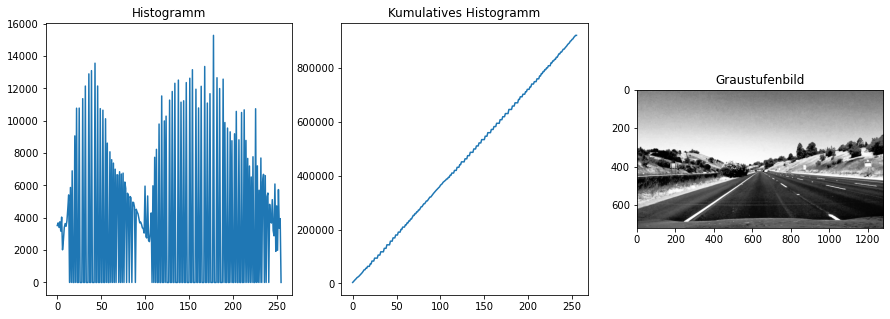

In [10]:
def histogram_equalization(img):
    """Wende Histogramm Equalization auf ein Graustufenbild an"""
    hist = histogram(img)
    cum_hist = comulative_histogram(hist)

    # Berechne die Transformation
    transformation = (cum_hist / cum_hist.max() * 255).astype(np.uint8)

    # Wende die Transformation auf das Bild an
    img_eq = transformation[img]

    return img_eq


# Lade das Beispielbild
img = cv2.imread('img/image001.jpg', -1)
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Wende Histogramm Equalization an
img_eq = histogram_equalization(img_gray)

# Berechne das Histogramm
hist_eq = histogram(img_eq)
cum_hist_eq = comulative_histogram(hist_eq)

# Zeige Ergebnisse
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
axs[0].plot(hist_eq)
axs[0].set_title('Histogramm')
axs[1].plot(cum_hist_eq)
axs[1].set_title('Kumulatives Histogramm')
axs[2].imshow(img_eq, cmap='gray')
axs[2].set_title('Graustufenbild')
plt.show()

Es ist zu sehen, dass die Histogrammgleichung die Verteilung der Pixelwerte so verändert, dass die Pixelwerte gleichmäßig über den gesamten Wertebereich verteilt sind. Dadurch wird der Kontrast des Bildes verbessert und die Helligkeit angepasst.

### 3.3 Anwendung des Histogramms - Thresholding/Punktoperation

#### Lineare Transformation

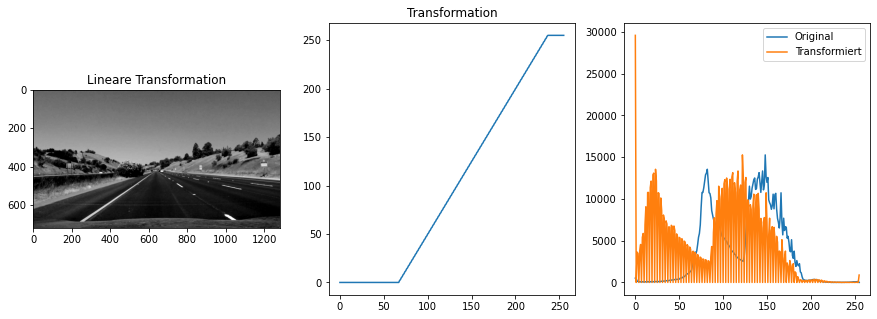

In [11]:
# Lade das Beispielbild
img = cv2.imread('img/image001.jpg', -1)
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Beschreibe lineare Transformation


def linear_transformation(img, a, b):
    """Wende eine lineare Transformation auf ein Bild an"""
    return np.clip(a * img + b, 0, 255).astype(np.uint8)


# Wende lineare Transformation an
img_linear = linear_transformation(img_gray, 1.5, -100)

# Zeige das Bild und die Transformation + Histogramm
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
axs[0].imshow(img_linear, cmap='gray')
axs[0].set_title('Lineare Transformation')
axs[1].plot(np.arange(256), linear_transformation(np.arange(256), 1.5, -100))
axs[1].set_title('Transformation')
axs[2].plot(histogram(img_gray), label='Original')
axs[2].plot(histogram(img_linear), label='Transformiert')
axs[2].legend()
plt.show()

### Thresholding

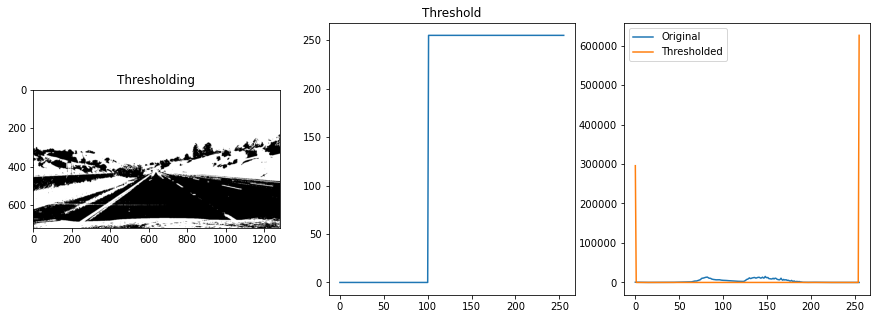

In [12]:
# Lade das Beispielbild
img = cv2.imread('img/image001.jpg', -1)
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Thresholding


def thresholding(img, threshold):
    """Wende Thresholding auf ein Bild an"""
    return np.where(img > threshold, 255, 0).astype(np.uint8)


# Wende Thresholding an
img_thresh = thresholding(img_gray, 100)

# Zeige das Bild und das Histogramm
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
axs[0].imshow(img_thresh, cmap='gray')
axs[0].set_title('Thresholding')
axs[1].plot(np.arange(256), thresholding(np.arange(256), 100))
axs[1].set_title('Threshold')
axs[2].plot(histogram(img_gray), label='Original')
axs[2].plot(histogram(img_thresh), label='Thresholded')
axs[2].legend()
plt.show()

## 4. Faltung

Die Faltung ist eine wichtige Operation in der Bildverarbeitung. Sie wird verwendet, um Filter auf Bilder anzuwenden und so bestimmte Eigenschaften von Bildern zu verändern. Die Faltung ist eine mathematische Operation, die ein Bild mit einem Filter faltet und so ein neues Bild erzeugt. Der Filter wird über das Bild geschoben und an jeder Position mit dem Bild multipliziert. Das Ergebnis wird aufsummiert und an der entsprechenden Position im neuen Bild gespeichert.

In [13]:
def faltung(img, kernel, stride=1, padding=0):
    """Wende Faltung auf ein Bild an"""
    # Berechne die Größe des Ausgabebildes
    out_shape = ((img.shape[0] - kernel.shape[0] + 2 * padding) // stride + 1,
                 (img.shape[1] - kernel.shape[1] + 2 * padding) // stride + 1)

    # Initialisiere das Ausgabebild
    out = np.zeros(out_shape)

    # Führe die Faltung durch
    padded_img = np.pad(
        img, [(padding, padding), (padding, padding)], mode='constant')
    for i in range(0, out_shape[0]):
        for j in range(0, out_shape[1]):
            out[i, j] = np.sum(
                padded_img[i*stride:i*stride+kernel.shape[0], j*stride:j*stride+kernel.shape[1]] * kernel)

    # Skaliere das Bild auf 0-255
    out = np.clip(out, 0, 255).astype(np.uint8)
    return out

Die obige Implementierung wird aufgrund der beiden For-Schleifen sehr langsam sein. Alternativ lässt sich folgende numpy-Funktion verwenden:

In [14]:
def faltung_numpy(img, kernel):
    """Wende Faltung auf ein Bild an mit numpy"""
    return np.clip(cv2.filter2D(img, -1, kernel), 0, 255).astype(np.uint8)

### 4.1. Durchschnittsfilter

Als Beispiel wird zunächst der Durchschnittsfilter vorgestellt. Der Durchschnittsfilter ist ein einfacher Filter, der dazu verwendet wird, um das Bild zu glätten. Er berechnet den Durchschnitt der Pixelwerte in einem Fenster und ersetzt den Pixelwert in der Mitte des Fensters durch den Durchschnitt.

Text(0.5, 1.0, 'Original')

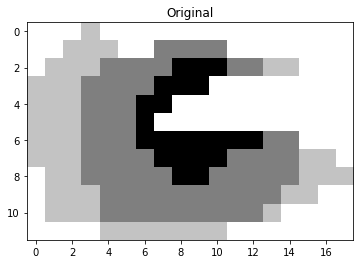

In [15]:
# Lade das Beispielbild
img = cv2.imread('img/raw_gray.png', cv2.IMREAD_GRAYSCALE)

# Zeige das Bild
plt.figure()
plt.imshow(img, cmap='gray')
plt.title('Original')

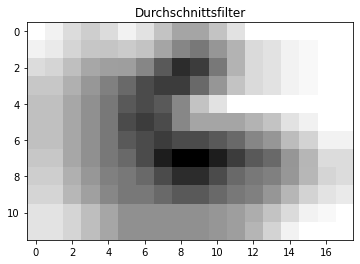

In [16]:
# Definiere den Kernel
kernel = np.array([[1, 1, 1],
                   [1, 1, 1],
                   [1, 1, 1]])
avg_kernel = kernel / np.sum(kernel)

# Wende Faltung an
# img_avg = faltung(img, avg_kernel)
img_avg = faltung_numpy(img, avg_kernel)

# Zeige das Bild
plt.figure()
plt.imshow(img_avg, cmap='gray')
plt.title('Durchschnittsfilter')
plt.show()

### 4.2. Gaussfilter

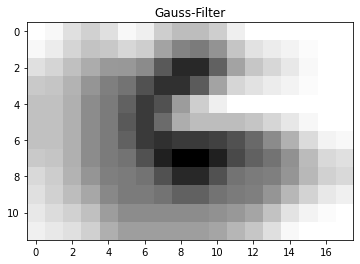

In [17]:
# Definiere den Gauss-Filter
kernel = np.array([[1, 2, 1],
                   [2, 4, 2],
                   [1, 2, 1]])

kernel = kernel / np.sum(kernel)

# Wende Faltung an
# img_gauss = faltung(img, kernel)
img_gauss = faltung_numpy(img, kernel)

# Zeige das Bild
plt.figure()
plt.imshow(img_gauss, cmap='gray')
plt.title('Gauss-Filter')
plt.show()

## 4.3 Anwendung der Faltung - Kantenerkennung

Die Kantenerkennung ist eine wichtige Methode in der Bildverarbeitung. Sie wird verwendet, um Kanten in Bildern zu erkennen und so Objekte in Bildern zu segmentieren.


### 4.3.1 Laplace-Filter

Erkennt Kanten in einem Bild anhand des quadratischen Gradienten.

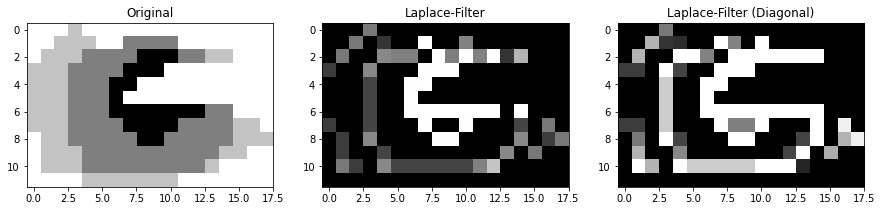

In [18]:
# Lade das Beispielbild
img = cv2.imread('img/raw_gray.png', cv2.IMREAD_GRAYSCALE)

# Definiere den Laplace-Filter
kernel = np.array([[0, 1, 0],
                   [1, -4, 1],
                   [0, 1, 0]])

# Incl. Diagonale
kernel_diag = np.array([[1, 1, 1],
                        [1, -8, 1],
                        [1, 1, 1]])

# Wende Faltung an
# img_laplace = faltung(img, kernel)
# img_laplace_diag = faltung(img, kernel_diag)
img_laplace = faltung_numpy(img, kernel)
img_laplace_diag = faltung_numpy(img, kernel_diag)

# Zeige das Bild
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
axs[0].imshow(img, cmap='gray')
axs[0].set_title('Original')
axs[1].imshow(img_laplace, cmap='gray')
axs[1].set_title('Laplace-Filter')
axs[2].imshow(img_laplace_diag, cmap='gray')
axs[2].set_title('Laplace-Filter (Diagonal)')
plt.show()

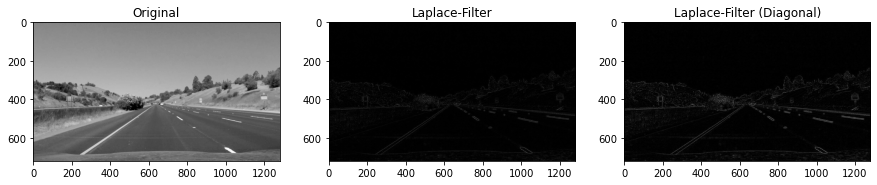

In [19]:
# Lade das Beispielbild
img = cv2.imread('img/image001.jpg', cv2.IMREAD_GRAYSCALE)

# Wende Laplace-Filter an
# img_laplace = faltung(img, kernel)
# img_laplace_diag = faltung(img, kernel_diag)
img_laplace = faltung_numpy(img, kernel)
img_laplace_diag = faltung_numpy(img, kernel_diag)

# Zeige das Bild
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
axs[0].imshow(img, cmap='gray')
axs[0].set_title('Original')
axs[1].imshow(img_laplace, cmap='gray')
axs[1].set_title('Laplace-Filter')
axs[2].imshow(img_laplace_diag, cmap='gray')
axs[2].set_title('Laplace-Filter (Diagonal)')
plt.show()


### 4.3.2 Sobel-Operator

Der Sobel-Operator ist ein einfacher Kantendetektor, der dazu verwendet wird, um Kanten in Bildern zu erkennen. Er berechnet die Ableitung des Bildes in horizontaler und vertikaler Richtung und kombiniert die Ergebnisse zu einem Bild, das die Kanten im Bild enthält.

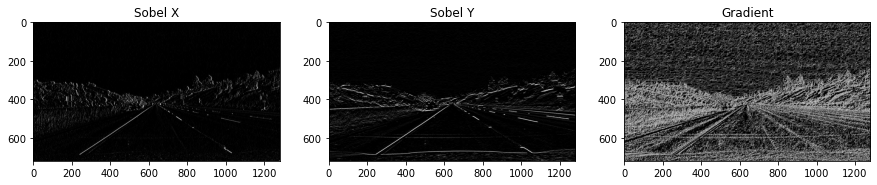

In [20]:
# Lade das Beispielbild
img = cv2.imread('img/image001.jpg', cv2.IMREAD_GRAYSCALE)

# Definiere den Sobel-Filter
sobel_x = np.array([[-1, 0, 1],
                    [-2, 0, 2],
                    [-1, 0, 1]])
sobel_y = np.array([[-1, -2, -1],
                    [0, 0, 0],
                    [1, 2, 1]])

# Wende Faltung an
# img_sobel_x = faltung(img, sobel_x)
# img_sobel_y = faltung(img, sobel_y)
img_sobel_x = faltung_numpy(img, sobel_x)
img_sobel_y = faltung_numpy(img, sobel_y)

# Berechne den Gradienten
gradient = np.sqrt(img_sobel_x**2 + img_sobel_y**2)

# Zeige das Bild
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
axs[0].imshow(img_sobel_x, cmap='gray')
axs[0].set_title('Sobel X')
axs[1].imshow(img_sobel_y, cmap='gray')
axs[1].set_title('Sobel Y')
axs[2].imshow(gradient, cmap='gray')
axs[2].set_title('Gradient')
plt.show()

*Hinweis: Die nachfolgende Zelle wurde in der Vorlesung nicht besprochen*

Nun lässt sich der Sobel Operator auch weiter zum Canny-Edge-Detector verbessern. Dieser besteht aus mehreren Schritten:

1. Glättung des Bildes mit einem Gaussfilter
2. Berechnung des Gradienten mit Sobel-Operatoren
3. Unterdrückung von nicht-maximalen Kanten
4. Hysterese-Schwellwert

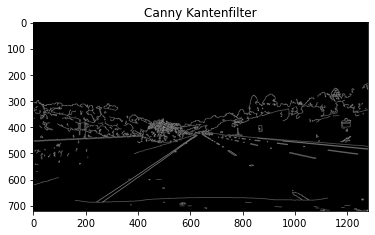

In [21]:
# Lade das Beispielbild
img = cv2.imread('img/image001.jpg', cv2.IMREAD_GRAYSCALE)

# Wende Canny-Kantenfilter an
edges = cv2.Canny(img, 100, 200)
# Hinweis: Für die Abgabe wird keine Canny-Kantenfilterung erwartet und ist optional (eigene Implementierung wird wahrscheinlich ziemlich langsam sein)

# Zeige das Bild
plt.figure()
plt.imshow(edges, cmap='gray')
plt.title('Canny Kantenfilter')
plt.show()

#### 4.3.3 Simpler Kantendetektor

**Sehr wichtiger Ansatz**

Der einfache Kantendetektor ist ein einfacher Algorithmus, der dazu verwendet wird, um Kanten in Bildern zu erkennen. Er berechnet die Differenz der Pixelwerte in horizontaler und vertikaler Richtung und ersetzt den Pixelwert in der Mitte des Fensters durch den Betrag der Differenz.

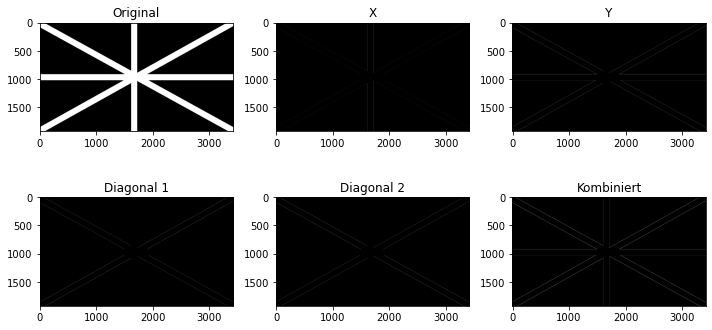

In [22]:
# Lade das Beispielbild
img = cv2.imread('img/simple.jpg', cv2.IMREAD_GRAYSCALE)

# Definiere Simplen Kantendetektor
kernel_x = np.array([[-1, 2, -1],
                     [-1, 2, -1],
                     [-1, 2, -1]])
kernel_y = np.array([[-1, -1, -1],
                     [2, 2, 2],
                     [-1, -1, -1]])
kernel_diag_1 = np.array([[-1, -1, 2],
                          [-1, 2, -1],
                          [2, -1, -1]])
kernel_diag_2 = np.array([[2, -1, -1],
                          [-1, 2, -1],
                          [-1, -1, 2]])

# Wende Faltung an
# img_x = faltung(img, kernel_x)
# img_y = faltung(img, kernel_y)
# img_diag_1 = faltung(img, kernel_diag_1)
# img_diag_2 = faltung(img, kernel_diag_2)
img_x = faltung_numpy(img, kernel_x)
img_y = faltung_numpy(img, kernel_y)
img_diag_1 = faltung_numpy(img, kernel_diag_1)
img_diag_2 = faltung_numpy(img, kernel_diag_2)

# Summiere die Ergebnisse
img_combined = img_x + img_y + img_diag_1 + img_diag_2
img_combined = np.clip(img_combined, 0, 255).astype(np.uint8)

# Zeige das Bild
fig, axs = plt.subplots(2, 3, figsize=(10, 5))
axs[0, 0].imshow(img, cmap='gray')
axs[0, 0].set_title('Original')
axs[0, 1].imshow(img_x, cmap='gray')
axs[0, 1].set_title('X')
axs[0, 2].imshow(img_y, cmap='gray')
axs[0, 2].set_title('Y')
axs[1, 0].imshow(img_diag_1, cmap='gray')
axs[1, 0].set_title('Diagonal 1')
axs[1, 1].imshow(img_diag_2, cmap='gray')
axs[1, 1].set_title('Diagonal 2')
axs[1, 2].imshow(img_combined, cmap='gray')
axs[1, 2].set_title('Kombiniert')
fig.tight_layout()
plt.show()

## 5. (Morphologische Filter)


### 5.1 Dilation und erosion

In [23]:
# Lade Beispiele

morph1 = cv2.imread("img/morph001.JPG", cv2.IMREAD_GRAYSCALE)
morph2 = cv2.imread("img/morph002.JPG", cv2.IMREAD_GRAYSCALE)
morph3 = cv2.imread("img/morph003.JPG", cv2.IMREAD_GRAYSCALE)
morph4 = cv2.imread("img/morph004.JPG", cv2.IMREAD_GRAYSCALE)
morph5 = cv2.imread("img/morph005.JPG", cv2.IMREAD_GRAYSCALE)
finger = cv2.imread("img/fingerabdruck.jpg", cv2.IMREAD_GRAYSCALE)


def apply_morph(img, kernel):
    """Wende Morphologische Operationen auf ein Bild an"""
    # Wende Dilation an
    img_dil = cv2.dilate(img, kernel)
    # Wende Erosion an
    img_ero = cv2.erode(img, kernel)
    # Zeige das Bild
    fig, axs = plt.subplots(1, 3, figsize=(15, 5))
    axs[0].imshow(img, cmap='gray')
    axs[0].set_title('Original')
    axs[1].imshow(img_dil, cmap='gray')
    axs[1].set_title('Dilation')
    axs[2].imshow(img_ero, cmap='gray')
    axs[2].set_title('Erosion')
    plt.show()


# Wende Dilation und Erosion an
kernel = np.array([[0, 1, 0],
                   [1, 1, 1],
                   [0, 1, 0]], np.uint8)

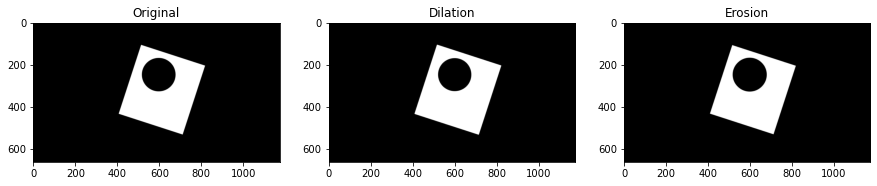

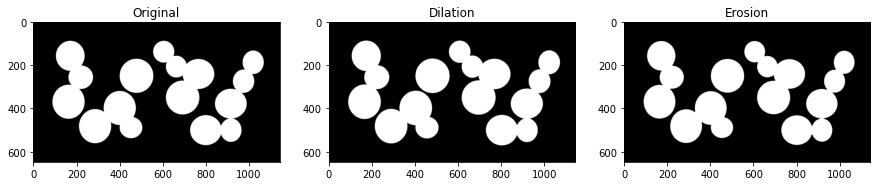

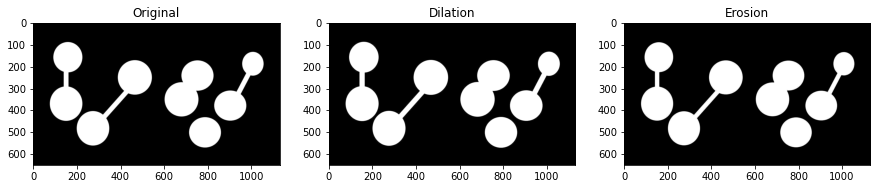

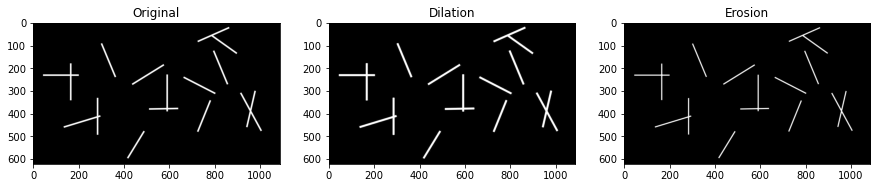

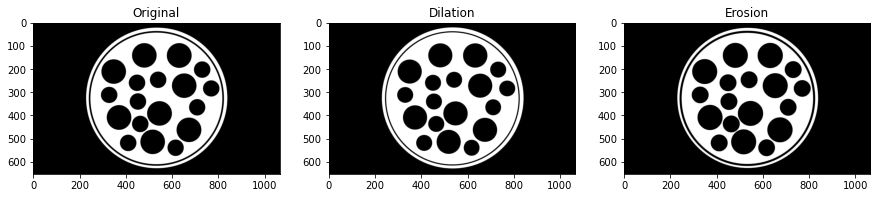

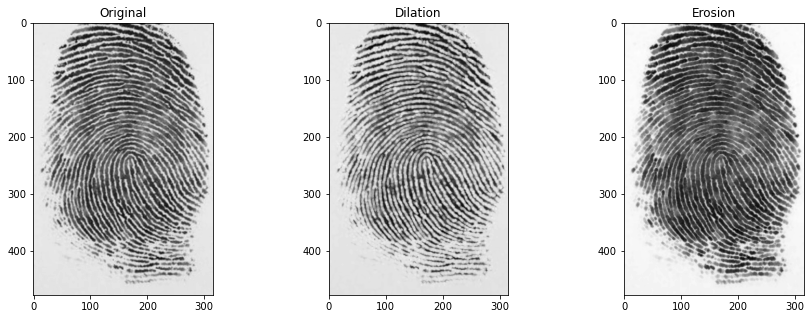

In [24]:
apply_morph(morph1, kernel)
apply_morph(morph2, kernel)
apply_morph(morph3, kernel)
apply_morph(morph4, kernel)
apply_morph(morph5, kernel)
apply_morph(finger, kernel)

### 5.2 Opening und Closing

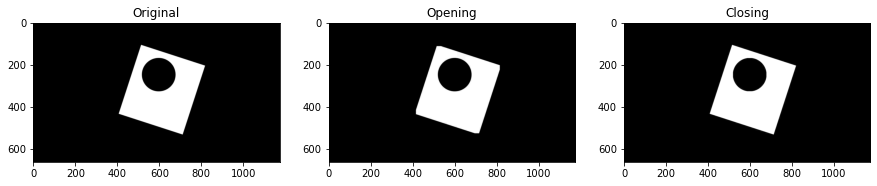

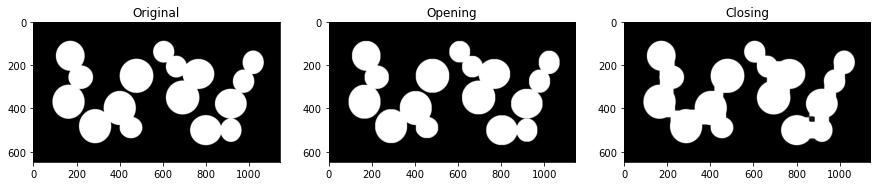

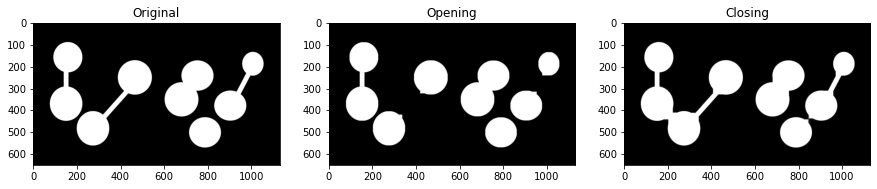

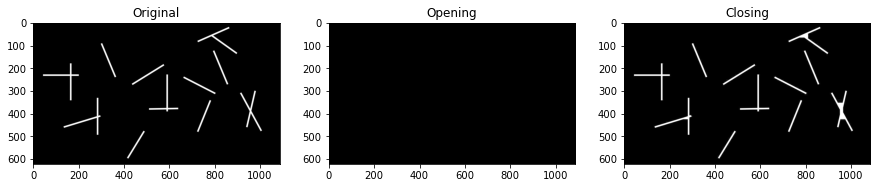

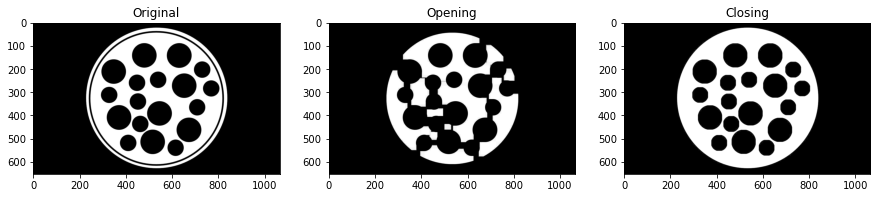

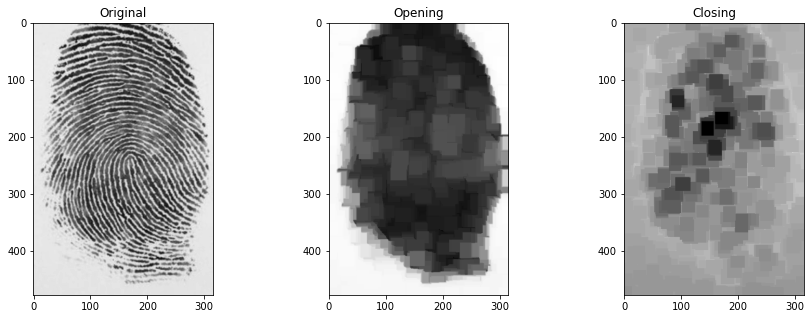

In [25]:
def apply_opening_closing(img, kernel):
    """Wende Opening und Closing auf ein Bild an"""
    # Wende Opening an
    img_open = cv2.morphologyEx(img, cv2.MORPH_OPEN, kernel, iterations=5)
    # Wende Closing an
    img_close = cv2.morphologyEx(img, cv2.MORPH_CLOSE, kernel, iterations=5)
    # Zeige das Bild
    fig, axs = plt.subplots(1, 3, figsize=(15, 5))
    axs[0].imshow(img, cmap='gray')
    axs[0].set_title('Original')
    axs[1].imshow(img_open, cmap='gray')
    axs[1].set_title('Opening')
    axs[2].imshow(img_close, cmap='gray')
    axs[2].set_title('Closing')
    plt.show()


kernel = np.ones((5, 5), np.uint8)

# Wende Opening und Closing an
apply_opening_closing(morph1, kernel)
apply_opening_closing(morph2, kernel)
apply_opening_closing(morph3, kernel)
apply_opening_closing(morph4, kernel)
apply_opening_closing(morph5, kernel)
apply_opening_closing(finger, kernel)

### 5.3 Boundary Extraction


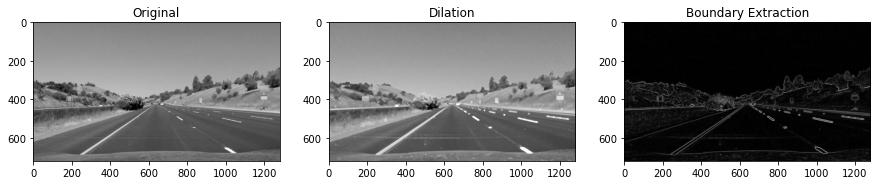

In [26]:
# Lade das Beispielbild
img = cv2.imread('img/image001.jpg', cv2.IMREAD_GRAYSCALE)

# Wende Boundary Extraction an
kernel = np.array([[0, 1, 0],
                   [1, 1, 1],
                   [0, 1, 0]], np.uint8)

# Wende Dilation an
img_dil = cv2.dilate(img, kernel, iterations=3)
# Berechne die Differenz
img_bound = img_dil - img

# Zeige das Bild
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
axs[0].imshow(img, cmap='gray')
axs[0].set_title('Original')
axs[1].imshow(img_dil, cmap='gray')
axs[1].set_title('Dilation')
axs[2].imshow(img_bound, cmap='gray')
axs[2].set_title('Boundary Extraction')
plt.show()

### 5.4 Hit-or-Miss Transformation

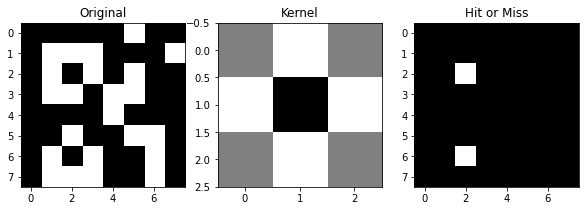

In [27]:
# Erstelle ein Bild
img = np.array([[0, 0, 0, 0, 0, 255, 0, 0],
                [0, 255, 255, 255, 0, 0, 0, 255],
                [0, 255, 0, 255, 0, 255, 0, 0],
                [0, 255, 255, 0, 255, 255, 0, 0],
                [0, 0, 0, 0, 255, 0, 0, 0],
                [0, 0, 255, 0, 0, 255, 255, 0],
                [0, 255, 0, 255, 0, 0, 255, 0],
                [0, 255, 255, 255, 0, 0, 255, 0]], dtype='uint8')

# Definiere den Kernel
kernel_center = np.array([[0, 1, 0], [1, -1, 1], [0, 1, 0]])
dst_morph_center = cv2.morphologyEx(img, cv2.MORPH_HITMISS, kernel_center)

# Zeige das Bild und Kernel
fig, axs = plt.subplots(1, 3, figsize=(10, 5))
axs[0].imshow(img, cmap='gray')
axs[0].set_title('Original')
axs[1].imshow(kernel_center, cmap='gray')
axs[1].set_title('Kernel')
axs[2].imshow(dst_morph_center, cmap='gray')
axs[2].set_title('Hit or Miss')
plt.show()